In [ ]:
# Install required packages
!pip install -q opendatasets
!pip install -q timm
!pip install -q albumentations
!pip install -q scikit-learn seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os
import zipfile

# Make the kaggle folder if not exists
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the right place
with open("kaggle.json", "rb") as f:
    with open("/root/.kaggle/kaggle.json", "wb") as kf:
        kf.write(f.read())

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!pip install -q kagglehub


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle (1).json


In [ ]:
import os
import shutil

# Make the kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move file
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
import kagglehub

# Automatically downloads to /root/.kagglehub
path = kagglehub.dataset_download("divg07/casia-20-image-tampering-detection-dataset")

print("Path to dataset files:", path)


100%|██████████| 2.56G/2.56G [00:31<00:00, 86.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/versions/1


In [ ]:
import os

# List the files and folders inside the downloaded dataset
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))


/root/.cache/kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/versions/1/CASIA2/CASIA 2 Groundtruth/Tp_D_NRN_S_N_sec10109_sec10113_10347_gt.png
/root/.cache/kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/versions/1/CASIA2/CASIA 2 Groundtruth/Tp_D_NRN_S_N_art00093_art00009_00536_gt.png
/root/.cache/kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/versions/1/CASIA2/CASIA 2 Groundtruth/Tp_S_NRN_S_N_ind00053_ind00053_10903_gt.png
/root/.cache/kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/versions/1/CASIA2/CASIA 2 Groundtruth/Tp_S_NNN_S_N_arc10122_arc10122_11885_gt.png
/root/.cache/kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/versions/1/CASIA2/CASIA 2 Groundtruth/Tp_S_NNN_S_N_sec00076_sec00076_00774_gt.png
/root/.cache/kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/versions/1/CASIA2/CASIA 2 Groundtruth/Tp_S_CND_S_N_sec00099_sec00099_10366_gt.png
/root/.cache/kag

In [ ]:
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
import torch

# ✅ Set your path from kagglehub output
base_path = "/root/.kagglehub/datasets/divg07/casia-20-image-tampering-detection-dataset/CASIA2"

# Custom Dataset
class CASIADataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.transform = transform
        self.data = []

        # Class 0: Authentic
        au_dir = os.path.join(root_dir, "Au")
        for fname in os.listdir(au_dir):
            if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                self.data.append((os.path.join(au_dir, fname), 0))

        # Class 1: Tampered (from both folders)
        for tamper_folder in ["Tp_DN", "Tp_Sp"]:
            tamper_path = os.path.join(root_dir, tamper_folder)
            for fname in os.listdir(tamper_path):
                if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                    self.data.append((os.path.join(tamper_path, fname), 1))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


In [ ]:
from google.colab import files

# Run this and it will prompt you to upload your kaggle.json file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aeplusjay","key":"aa8ac395d0f2cd243d46a040379de7ac"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d divg07/casia-20-image-tampering-detection-dataset


Dataset URL: https://www.kaggle.com/datasets/divg07/casia-20-image-tampering-detection-dataset
License(s): unknown


In [ ]:
!unzip casia-20-image-tampering-detection-dataset.zip -d casia2


Streaming output truncated to the last 5000 lines.
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00095_11803.jpg  
  inflating: casia2/CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00096_11802.jpg  


In [ ]:
!pip install -q torch torchvision matplotlib seaborn scikit-learn opencv-python


In [ ]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class CASIADataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.data = []
        self.transform = transform

        # Authentic images: label 0
        au_dir = os.path.join(root_dir, "Au")
        for fname in os.listdir(au_dir):
            if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                self.data.append((os.path.join(au_dir, fname), 0))

        # Tampered images: label 1
        tp_dir = os.path.join(root_dir, "Tp")
        for fname in os.listdir(tp_dir):
            if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                self.data.append((os.path.join(tp_dir, fname), 1))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Dataset path
dataset_path = "casia2/CASIA2"
dataset = CASIADataset(root_dir=dataset_path, transform=transform)

# Split: 70% train, 15% val, 15% test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

print(f"✅ Dataset loaded: {len(train_dataset)} train, {len(val_dataset)} val, {len(test_dataset)} test")


✅ Dataset loaded: 6650 train, 1425 val, 1426 test


In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Load ResNet18 pre-trained on ImageNet
model = models.resnet18(pretrained=True)

# Modify final layer for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 98.1MB/s]


In [ ]:
from tqdm import tqdm

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0

        print(f"\n🚀 Epoch {epoch+1}/{num_epochs}")
        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels)

        train_acc = correct.double() / len(train_loader.dataset)
        print(f"✅ Train Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.4f}")

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += torch.sum(preds == labels)

        val_acc = correct.double() / len(val_loader.dataset)
        print(f"🧪 Val Loss: {val_loss/len(val_loader):.4f}, Accuracy: {val_acc:.4f}")

train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5)



🚀 Epoch 1/5


100%|██████████| 208/208 [26:38<00:00,  7.68s/it]


✅ Train Loss: 0.4269, Accuracy: 0.8104
🧪 Val Loss: 0.4611, Accuracy: 0.7951

🚀 Epoch 2/5


100%|██████████| 208/208 [26:50<00:00,  7.74s/it]


✅ Train Loss: 0.2708, Accuracy: 0.8752
🧪 Val Loss: 0.4512, Accuracy: 0.7986

🚀 Epoch 3/5


100%|██████████| 208/208 [26:25<00:00,  7.62s/it]


✅ Train Loss: 0.2148, Accuracy: 0.9057
🧪 Val Loss: 0.4390, Accuracy: 0.8021

🚀 Epoch 4/5


100%|██████████| 208/208 [26:32<00:00,  7.66s/it]


✅ Train Loss: 0.1757, Accuracy: 0.9208
🧪 Val Loss: 0.4954, Accuracy: 0.7881

🚀 Epoch 5/5


100%|██████████| 208/208 [26:33<00:00,  7.66s/it]


✅ Train Loss: 0.1562, Accuracy: 0.9305
🧪 Val Loss: 0.6462, Accuracy: 0.7025


In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Evaluate on Test Set
model.eval()
y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        scores = probs[:, 1].cpu().numpy()
        preds = torch.argmax(outputs, 1).cpu().numpy()

        y_scores.extend(scores)
        y_pred.extend(preds)
        y_true.extend(labels.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)

test_acc = np.sum(y_true == y_pred) / len(y_true)
print(f"🎯 Test Accuracy: {test_acc:.4f}")


🎯 Test Accuracy: 0.6851


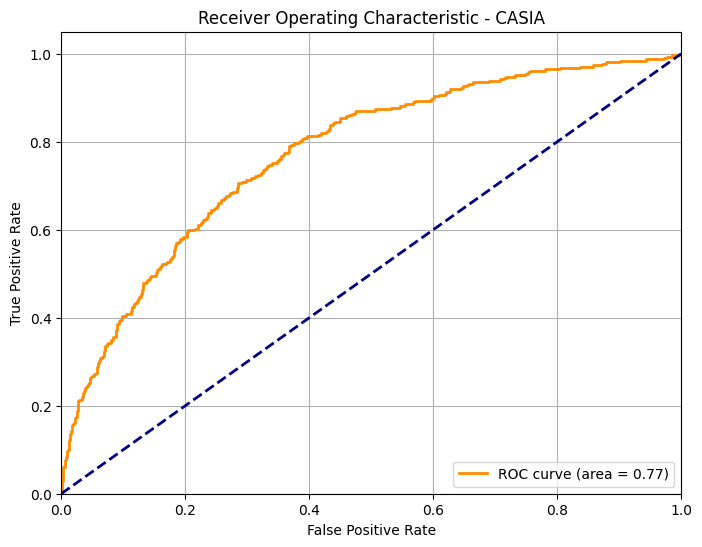

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CASIA')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_curve.png")
plt.show()


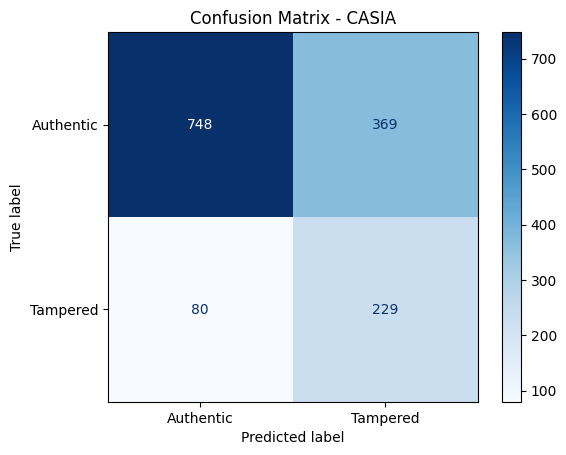

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Authentic", "Tampered"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CASIA")
plt.savefig("confusion_matrix.png")
plt.show()


In [ ]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=a97e61b88723900be3bf5143aad9f6dcbee4dc1aa8c9a21278e0f2fee70cf784
  Stored in directory: /root/.cache/pip/wheels/bc/52/78/893c3b94279ef238f43a9e89608af648de401b96415bebbd1f
Successfully built grad-cam


In [ ]:
!pip install -U grad-cam


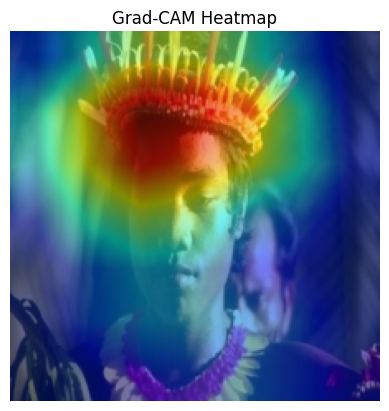

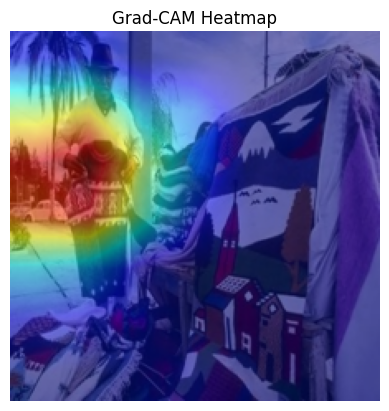

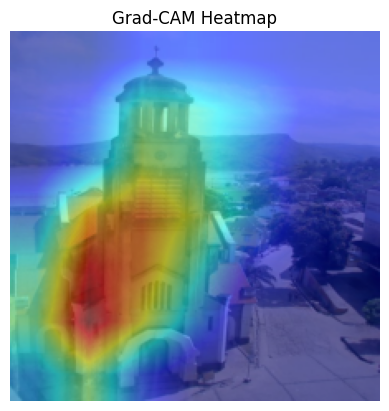

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.transforms.functional import to_pil_image

def apply_gradcam(model, img_tensor, target_layer):
    model.eval()

    cam = GradCAM(model=model, target_layers=[target_layer])
    grayscale_cam = cam(input_tensor=img_tensor.unsqueeze(0))[0, :]

    rgb_img = img_tensor.permute(1, 2, 0).cpu().numpy()
    rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())
    cam_img = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    plt.imshow(cam_img)
    plt.axis('off')
    plt.title("Grad-CAM Heatmap")
    plt.show()

# 🔍 Show Grad-CAM for a few test images
for i, (img, label) in enumerate(test_loader):
    if i == 3: break  # Show only 3 images
    apply_gradcam(model, img[0].to(device), model.layer4[-1])
